### CASE STUDY: FASTEST AIRLINES (PART 1)

#### 1. Objectives

The purpose of this study is to become familiarize with Python to perform basic data analysis.
There are many ways to assess the quality of an airline. You will learn how to assess airlines
based on historical flight data. In the first part of the case, we will determine which airline is the
fastest based on flight time calculations. In the second part, we will develop a predictive model to
determine the likelihood of delays using what you’ve learned from the lecture.
The objectives of the first part of the case study is to:

• Read data using the csv package and output results

• Become familiarize with different data structures such as lists and dictionaries

• Use conditionals and loops to process data, fix anomalies and perform calculations

• Perform basic plotting in Python using the package matplotlib

#### 2. How do we determine which airline is the “fastest”?

Consider the following scenario. Airline A says they will get you from LGA to DCA in 45
minutes, but took 60 minutes instead. On the same route, Airline B says it will only take 70
minutes but actually took 65 minutes. Which airline do you consider the fastest?

Most people will say Airline A since the trip took 60 minutes as opposed to 65. However,
according to the government, Airline A is “late” since it took longer than 15 minutes to arrive.
Because of this, most airlines pad their schedules by saying flight times are longer than they usually
are. How do we accurately determine which airline is the fastest? An approach using historical
data was proposed in [1]. In this case study, we will reproduce some of the results found in the
study to determine the fastest airlines.

The dataset FlightTime.csv contains 743 observations of flights from ORD to LAX throughout
November 2015. There are 10 variables.

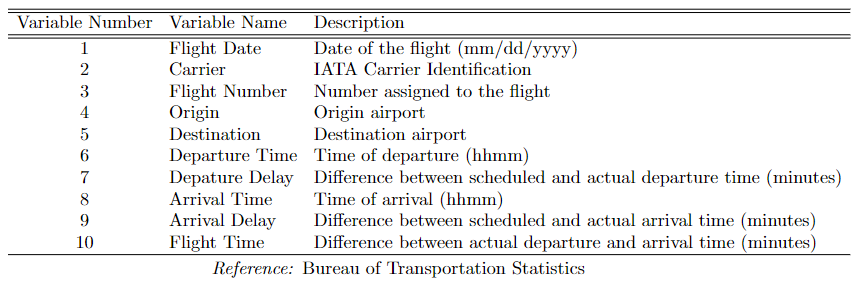

There are four types of time we are interested in:

(1) Flight Time: The difference between the departure time and arrival time.

(2) Average Flight Time: The average time an airline takes to complete the route.

(3) Target Flight Time: An estimate of how long a flight should take based on distance
and direction of travel. This is calculated based on the spherical distance (great circle
distance). There are many ways to compute this but we will use a simplified formula that
does not include the complex variables like windspeed, jetstreams, etc. Let lori and ldes
is the longitude of the origin and destination respectively, and d be the spherical distance
between two points. Assuming a constant velocity and an average time of 20 minutes to
runway time, define T F T = 0.117 ∗ d + .517 ∗ (lori − ldes) + 20.

(4) Typical time: Calculated by the target time plus the average delay associated with the
origin and departure airport.

The measure of an airline’s performance is determined by the difference between average flight time
and typical time which is called time added. The lower the time added, the faster the airline is
on that particular route.

#### Exercise 1

Using FlightTime.csv, write a Python program to perform the following.

(1) Read the dataset, ignoring any observations without a recorded departure or arrival time.
Some times are recorded incorrectly resulting in incorrect flight time. For any flight time
less than 230 minutes, delete the observations.

In [1]:
### To make an additional cell, use Esc + B
### To remove an existing cell, use Esc + D + D
### To convert a coding cell to a text cell, use Esc + M
### To convert a text cell to a coding cell, use Esc + Y

In [3]:
# solution to part (1)

import pandas as pd

file = "FlightTime.csv"
df = pd.read_csv(file)

df = df.dropna(how="any")
df = df[df["Flight Time"] >= 230]
df

,Flight Date,Carrier,Flight Number,Origin,Destination,Departure Time,Departure Delay,Arrival Time,Arrival Delay,Flight Time
0,11/1/2015,AA,111,ORD,LAX,1709.0,-1.0,1952.0,2.0,283
1,11/1/2015,AA,1092,ORD,LAX,2021.0,-4.0,2243.0,-20.0,262
2,11/1/2015,AA,1081,ORD,LAX,841.0,-4.0,1052.0,-33.0,251
3,11/1/2015,AA,1243,ORD,LAX,705.0,-5.0,919.0,-31.0,254
4,11/1/2015,AA,1358,ORD,LAX,1508.0,-2.0,1739.0,-10.0,271
...,...,...,...,...,...,...,...,...,...,...
737,11/30/2015,UA,793,ORD,LAX,1610.0,3.0,1827.0,-16.0,257
738,11/30/2015,UA,1098,ORD,LAX,611.0,-5.0,829.0,-25.0,258
739,11/30/2015,UA,1440,ORD,LAX,2247.0,97.0,101.0,75.0,254
740,11/30/2015,VX,231,ORD,LAX,732.0,32.0,957.0,22.0,265


(2) Calculate the number of observations in your dataset.

In [4]:
print(df.count())

# solution to part (2): 729

Flight Date        729
Carrier            729
Flight Number      729
Origin             729
Destination        729
Departure Time     729
Departure Delay    729
Arrival Time       729
Arrival Delay      729
Flight Time        729
dtype: int64


(3) Calculate the target flight time with $d = 1741.16$ mi, $l_{ori} = −87.90◦$ and $l_{des} = −118.41◦$.

In [6]:
# T F T = 0.117 ∗ d + .517 ∗ (lori − ldes) + 20

d = 1741.16
lori = -87.90
ldes = -118.41

TFT = 0.117*d + .517*(lori-ldes) + 20
print(TFT)

# solution to part (3): 239.489

239.48939000000001


(4) Calculate the typical time of this route. You will need to get the average of the departure
and arrival delays and add it to the target flight time.

In [7]:
# Typical time: Calculated by the target time plus the average delay associated with the origin and departure airport.

avg_dep_del = df["Departure Delay"].mean()
avg_arr_del = df["Arrival Delay"].mean()

typical_time = TFT + avg_dep_del + avg_arr_del
print(typical_time)

# solution to part (4): 263.122

263.1217631138546


(5) Calculate the time added for each airline and determine which airline have the lowest time added. Note, you will need to calculate the average flight time for each airline.

In [30]:
avg_flight = df.groupby('Carrier')['Flight Time'].mean()
print(avg_flight)
time_added = avg_flight - TFT
lowest_time = time_added.idxmin()
lowest_time

# solution to part (5): VX

Carrier
AA    267.375439
F9    275.310345
NK    267.559322
UA    269.174497
VX    265.913793
Name: Flight Time, dtype: float64


'VX'

(6) Output the results of your calculations to a text file.

In [25]:
with open ('flight_time_results.txt', 'w') as f:
    f.write(f"Number of observations: {df.count()}\n\n")
    f.write(f"Target flight time: {TFT: .2f} minutes \n")
    f.write(f"Typical time of this route: {typical_time: .2f} minutes \n")
    f.write("\nTime added per airline: \n")
    for airline, per_airline in time_added.items():
        f.write(f"{airline}: {per_airline: .2f} minutes\n")
    f.write(f"\nAirline with lowest time added: {lowest_time}\n")

#### Exercise 2

Using matplotlib, create a bar graph for the time added of each airline. Be sure to
label your axes and plot. You may use PdfPages from matplotlib to output the plot or simply print
screen and save it.

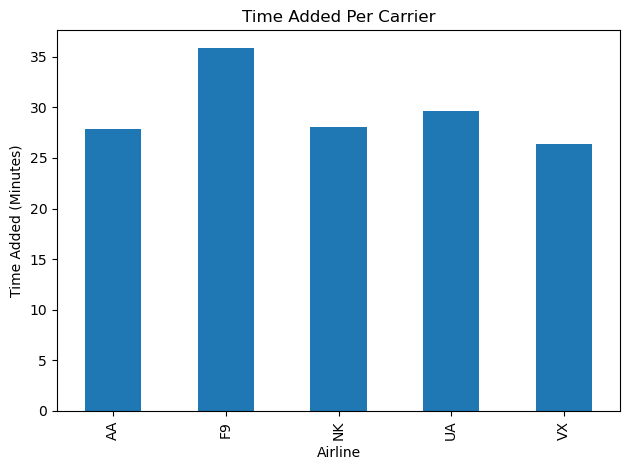

In [11]:
import matplotlib.pyplot as plt

time_added.plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('Time Added (Minutes)')
plt.title('Time Added Per Carrier')
plt.tight_layout()
plt.savefig('time_added')
plt.show()

#### Submit the output from Exercise 1, your plot and code to your lab section TA.

#### References

[1] “How We Found The Fastest Flights.” How We Found The Fastest Flights. 11 Mar. 2015. Web. 1 Aug. 2015.